In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
weights_and_biases = np.load("./model/weights.npz")

b1 = weights_and_biases['b1']
w1 = weights_and_biases['w1']
b2 = weights_and_biases['b2']
w2 = weights_and_biases['w2']
b3 = weights_and_biases['b3']
w3 = weights_and_biases['w3']

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

In [4]:
def forward_propagation(image_batch, w1, b1, w2, b2, w3, b3):
    z1 = np.dot(image_batch, w1) + b1
    a1 = relu(z1)
    
    z2 = np.dot(a1, w2) + b2
    a2 = relu(z2)
    
    z3 = np.dot(a2, w3) + b3
    y_pred = softmax(z3)
    
    return y_pred

In [5]:
data = pd.read_csv("./data/mnist_test.csv")
data = np.array(data)

images = data[:, 1:] / 255.0

In [6]:
def display_image(image, prediction):
    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.title(f'Predicted Class: {prediction}')
    plt.axis('off')
    plt.show()

Enter a number between 0 to 9999: 756


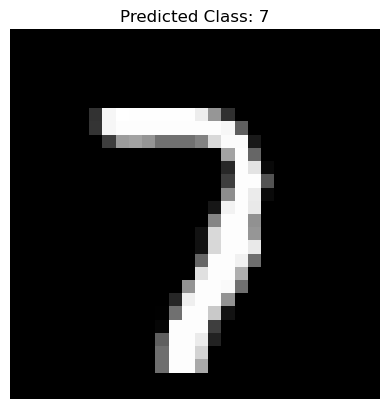

In [9]:
image_index = int(input(f"Enter a number between 0 to {len(images) - 1}: "))
image_to_predict = images[image_index]

predictions = forward_propagation(image_to_predict, w1, b1, w2, b2, w3, b3)
prediction = np.argmax(predictions)
display_image(image_to_predict, prediction)